In [1]:
import pandas as pd
import geopandas
from opt_funcs import optimise
from opt_funcs_p import optimise_parallel
import matplotlib.pyplot as plt

In [4]:
buildings_df = pd.read_csv("save_files/buildings_all_zones_df.csv")
grid_gdf = geopandas.read_file("save_files/grid_250.shp")
grid_intervals = 250

In [5]:
# res = optimise(n_fac=12,
#                n_iterations=5000,
#                buildings_df=buildings_df,
#                grid_gdf=grid_gdf,
#                grid_intervals=grid_intervals)


# vardict = {}
# obdict = {}
# for r in range(len(res.result)):
#     vardict[r] = res.result[r].variables
#     obdict[r] = res.result[r].objectives[:]
    
# pd.DataFrame(obdict).to_csv("save_files/ob_init.csv")
# pd.DataFrame(vardict).to_csv("save_files/var_init.csv")

In [6]:
saved_results_vars = pd.read_csv("save_files/nfe10000_10_NSGAII_NC/variables_nfe10000_10_NSGAII_NC.csv",index_col=0)
saved_results_obj = pd.read_csv("save_files/nfe10000_10_NSGAII_NC/objectives_nfe10000_10_NSGAII_NC.csv",index_col=0)

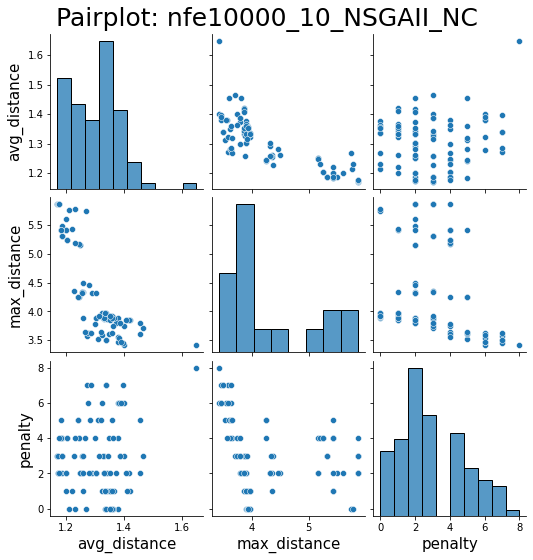

In [7]:
import seaborn
objectives = saved_results_obj.iloc[0:100,:]
variables = saved_results_vars.iloc[0:100,:]
objectives.columns = ["avg_distance","max_distance","penalty"]
seaborn.set_context( rc={"axes.labelsize":15})
pp = seaborn.pairplot(objectives)#raw_results.iloc[:,1:])
pp.fig.suptitle("Pairplot: nfe10000_10_NSGAII_NC",y=1.03,size=25);

In [ ]:
import plotly.express as px


fig = px.parallel_coordinates(objectives, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color="penalty",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=4.5,
                              title="Parallel axis plot of found solutions")
fig.show()

In [ ]:
objectives_0 = objectives[objectives.penalty==0]
variables_0 = variables[objectives.penalty==0]

fig = px.parallel_coordinates(objectives_0, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=4.5,
                              title="Parallel axis plot of policy options")
fig.show()

print(len(objectives_0))

In [ ]:
from shapely.geometry import Point, MultiPoint
import seaborn


# Create geodataframe
multipointlist = list()
for i in range(len(variables_0)):
    pointlist = list()
    for j in range(int(len(variables_0.iloc[i,:])/2.)):
        pointlist.append(Point(variables_0.iloc[i,j*2],variables_0.iloc[i,j*2+1]))
    multipointlist.append(MultiPoint(pointlist))

gdf_as_dict = {}
gdf_as_dict['avg_distance'] = objectives_0.avg_distance
gdf_as_dict['max_distance'] = objectives_0.max_distance
gdf_as_dict['geometry'] = multipointlist

gdf_0 = geopandas.GeoDataFrame(gdf_as_dict)


# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)

for i in gdf_0.index:
    gdf_0.loc[[i],'geometry'].plot(ax=ax)
plt.title("penalty 0",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [ ]:
objectives_0f = objectives_0[objectives_0.max_distance<4.2]
variables_0f = variables_0[objectives_0.max_distance<4.2]


fig = px.parallel_coordinates(objectives_0f, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=4.5,
                              title="Parallel axis plot of policy options")
fig.show()

In [ ]:
from shapely.geometry import Point, MultiPoint
import seaborn


# Create geodataframe
multipointlist = list()
for i in range(len(variables_0f)):
    pointlist = list()
    for j in range(int(len(variables_0f.iloc[i,:])/2.)):
        pointlist.append(Point(variables_0f.iloc[i,j*2],variables_0f.iloc[i,j*2+1]))
    multipointlist.append(MultiPoint(pointlist))

gdf_as_dict = {}
gdf_as_dict['avg_distance'] = objectives_0f.avg_distance
gdf_as_dict['max_distance'] = objectives_0f.max_distance
gdf_as_dict['geometry'] = multipointlist

gdf_0f = geopandas.GeoDataFrame(gdf_as_dict)


# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)

for i in gdf_0f.index:
    gdf_0f.loc[[i],'geometry'].plot(ax=ax)
plt.title("penalty 0f",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [ ]:
objectives_7 = objectives[objectives.penalty==7]
variables_7 = variables[objectives.penalty==7]

fig = px.parallel_coordinates(objectives_7, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=4.5,
                              title="Parallel axis plot of policy options")
fig.show()

print(len(objectives_7))

In [ ]:
from shapely.geometry import Point, MultiPoint
import seaborn


# Create geodataframe
multipointlist = list()
for i in range(len(variables_7)):
    pointlist = list()
    for j in range(int(len(variables_7.iloc[i,:])/2.)):
        pointlist.append(Point(variables_7.iloc[i,j*2],variables_7.iloc[i,j*2+1]))
    multipointlist.append(MultiPoint(pointlist))

gdf_as_dict = {}
gdf_as_dict['avg_distance'] = objectives_7.avg_distance
gdf_as_dict['max_distance'] = objectives_7.max_distance
gdf_as_dict['geometry'] = multipointlist

gdf_7 = geopandas.GeoDataFrame(gdf_as_dict)

# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)

for i in gdf_7.index:
    gdf_7.loc[[i],'geometry'].plot(ax=ax)
plt.title("penalty 7",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [ ]:
# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)

i = gdf_7.index[0]
gdf_7.loc[[i],'geometry'].plot(ax=ax,color='green')
j = gdf_0.index[0]
gdf_0.loc[[j],'geometry'].plot(ax=ax,color='red')

plt.title("penalty 0,7; comparative",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [ ]:
print("Average distance of proposed system is: ",gdf_0f.avg_distance[0],"\n","Maximal distance of proposed system is: ",gdf_0f.max_distance[0])

print("Number of buildings is: ",len(buildings))

In [ ]:
final_gdf_dict = {}
final_gdf_dict["fatm_id"] = list()
final_gdf_dict["geometry"] = list()

for p in range(len(gdf_0f.geometry[0])):
    final_gdf_dict["fatm_id"].append(p)
    final_gdf_dict["geometry"].append(gdf_0f.geometry[0][p])

geopandas.GeoDataFrame(final_gdf_dict).to_file("save_files/gdf_0f/gdf_0f.shp")

In [ ]:
# Plot figure
seaborn.set_context( rc={"axes.labelsize":15})
fig,ax = plt.subplots(figsize=(10,10))
buildings = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
buildings.plot(ax=ax)
geopandas.GeoDataFrame(final_gdf_dict).plot(ax=ax)

plt.title("selected opt, penalty=0",fontsize=15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

plt.savefig("save_files/gdf_0f/output.png")

In [ ]:
print(pd.DataFrame(final_gdf_dict))